<a href="https://colab.research.google.com/github/michellechen202212/ucb/blob/main/module5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('sample_data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# Check for missing values
missing_data = data.isnull().sum()
missing_data[missing_data > 0]


,0
car,12576
Bar,107
CoffeeHouse,217
CarryAway,151
RestaurantLessThan20,130
Restaurant20To50,189


The dataset contains missing values in several columns. Notably, the car column has 12,576 missing entries, representing a substantial portion of the data. Additionally, columns related to user behavior (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50) have between 107 and 217 missing values. These missing data points will need to be addressed through either imputation or removal before proceeding with further analysis.

Based on the significiance of the data and how much is missing, here is a strategy for handling missing data:
1. drop the car column
2. impute missing values for behavior-related columns, such as Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50.

The decision to drop the car column is based on the fact that a large portion of its data is missing, making it difficult to impute values accurately. Additionally, the presence of other relevant user attributes makes this column less critical to the overall analysis.
For the behavior-related columns, I chose to impute missing values using the mode because these columns contain categorical data, and using the most frequent value ensures that the distribution of responses remains consistent.

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# Drop the 'car' column due to excessive missing values
data = data.drop(columns=['car'])

# Impute missing values in behavior-related columns with mode
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Verify that no missing values remain
data.isnull().sum()


,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


I decided to drop the car column due to the significant number of missing values, which made it difficult to accurately impute values. The other behavior-related columns (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50) have much smaller amounts of missing data. Since these columns are important for understanding coupon acceptance, I imputed the missing values with the mode (most frequent value) to maintain the integrity of the dataset.

4. What proportion of the total observations chose to accept the coupon?



In [7]:
# Determine the percentage of instances where the coupon was accepted (Y = 1).
total_observations = len(data)
accepted_coupons = data['Y'].sum()

# Compute the fraction
proportion_accepted = accepted_coupons / total_observations

# Display the result
proportion_accepted


0.5684326710816777

Out of the total observations in the dataset, approximately 56.84% of the respondents chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

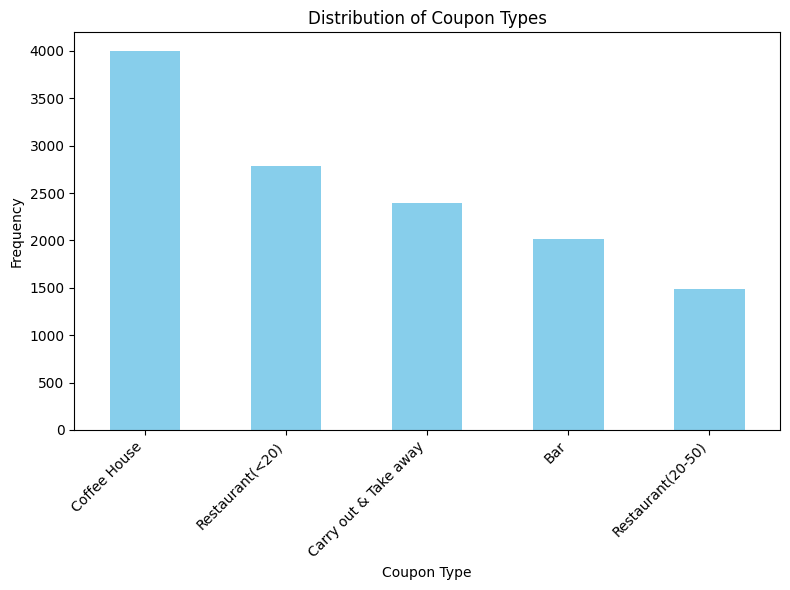

In [8]:
import matplotlib.pyplot as plt

# Generate a bar chart for the 'coupon' column to display the distribution of various coupon types.
coupon_counts = data['coupon'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8,6))
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


The bar plot above visualizes the distribution of the different coupon types in the dataset. It shows the frequency of each type of coupon offered, helping us understand the relative prevalence of various coupons, such as restaurants, coffee houses, bars, and takeaway options.

6. Use a histogram to visualize the temperature column.

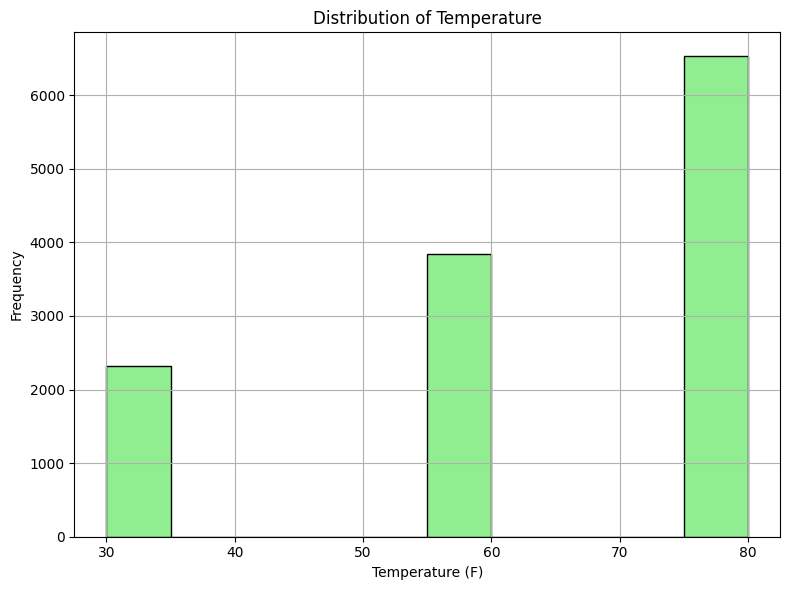

In [9]:
# Create a histogram to illustrate the distribution of values in the 'temperature' column.
plt.figure(figsize=(8,6))
plt.hist(data['temperature'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


The histogram above displays the distribution of temperatures in the dataset. The x-axis denotes various temperature ranges (in Fahrenheit), while the y-axis indicates the frequency of occurrences for each range. This provides insight into the most frequent temperature ranges when coupons were distributed.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
# Create a new DataFrame that includes only the rows where the 'coupon' column corresponds to bar-related coupons.
bar_coupons_df = data[data['coupon'] == 'Bar']

# Show the initial rows of the newly created DataFrame.
bar_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


A new DataFrame has been generated, containing only the rows where the coupon type pertains to bars. This filtered dataset enables us to concentrate solely on bar-related coupon data for more detailed analysis.


2. What proportion of bar coupons were accepted?


In [11]:
# Compute the percentage of bar coupons that were accepted (Y = 1)
total_bar_coupons = len(bar_coupons_df)
accepted_bar_coupons = bar_coupons_df['Y'].sum()

# Calculate the proportion
proportion_accepted_bar = accepted_bar_coupons / total_bar_coupons

# Display the result
proportion_accepted_bar


0.41001487357461575

Around 41.00% of bar-related coupons were accepted by respondents. This percentage suggests that less than half of the individuals opted to redeem the bar coupons.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
# Create two subsets: one for individuals who visit a bar 3 or fewer times, and another for those who visit more than 3 times.
bar_fewer_than_3 = bar_coupons_df[bar_coupons_df['Bar'].isin(['0', '1~3'])]
bar_more_than_3 = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]

# Calculate the acceptance rate for each group
acceptance_rate_fewer_than_3 = bar_fewer_than_3['Y'].mean()
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean()

# Display the results
acceptance_rate_fewer_than_3, acceptance_rate_more_than_3


(0.6473551637279596, 0.7688442211055276)

The acceptance rate for bar coupons among individuals who visited a bar 3 or fewer times per month is about 64.74%. In contrast, those who visited bars more than 3 times per month had a higher acceptance rate of approximately 76.88%.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
# Create two subsets: one for drivers over 25 who visit a bar more than once a month, and another for all other drivers.
bar_more_than_once_and_over_25 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'] != 'below21') & (bar_coupons_df['age'] != '21')]
all_others = bar_coupons_df[~bar_coupons_df.index.isin(bar_more_than_once_and_over_25.index)]

# Calculate the acceptance rate for each group
acceptance_rate_more_than_once_and_over_25 = bar_more_than_once_and_over_25['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

# Display the results
acceptance_rate_more_than_once_and_over_25, acceptance_rate_all_others


(0.6952380952380952, 0.33500313087038197)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [14]:
# Create two subsets: one for drivers who visit bars more than once a month, had passengers other than children, and whose occupations are not in farming, fishing, or forestry.
bar_more_than_once_passengers_not_kid_other_occupations = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['occupation'] != 'Farming, Fishing, & Forestry')
]

all_others_criteria = bar_coupons_df[~bar_coupons_df.index.isin(bar_more_than_once_passengers_not_kid_other_occupations.index)]

# Determine the acceptance rate for each group.
acceptance_rate_passengers_not_kid_other_occupations = bar_more_than_once_passengers_not_kid_other_occupations['Y'].mean()
acceptance_rate_all_others_criteria = all_others_criteria['Y'].mean()

# Display the results
acceptance_rate_passengers_not_kid_other_occupations, acceptance_rate_all_others_criteria


(0.7132486388384754, 0.296043656207367)

The acceptance rate for drivers who visit bars more than once a month, had passengers other than children, and work in occupations outside of farming, fishing, or forestry is about 71.32%. In contrast, the acceptance rate for all other drivers is considerably lower, at around 29.60%.

This suggests that this particular group of drivers is much more inclined to accept bar coupons compared to others.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [15]:
# Create subsets based on each of the three conditions separately.

# Condition 1: visit bars more than once a month, had passengers other than children, and were not widowed.
condition_1 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['maritalStatus'] != 'Widowed')
]

# Condition 2: frequent bars more than once a month and are under 30 years old
condition_2 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons_df['age'].isin(['below21', '21', '26', '30']))
]

# Condition 3: dine at inexpensive restaurants more than 4 times a month with an income below 50K
condition_3 = bar_coupons_df[
    (bar_coupons_df['RestaurantLessThan20'] == '4~8') &
    (bar_coupons_df['income'].isin(['less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]

# Determine the acceptance rate for each condition.
acceptance_rate_condition_1 = condition_1['Y'].mean()
acceptance_rate_condition_2 = condition_2['Y'].mean()
acceptance_rate_condition_3 = condition_3['Y'].mean()

# Display the results
acceptance_rate_condition_1, acceptance_rate_condition_2, acceptance_rate_condition_3


(0.7132486388384754, 0.7217391304347827, 0.41578947368421054)

The acceptance rate for drivers who visit bars more than once a month, had passengers other than children, and are not widowed is around 71.32%. For drivers who frequent bars more than once a month and are under 30, the acceptance rate is slightly higher, at approximately 72.17%. In contrast, the acceptance rate for drivers who visit cheap restaurants more than 4 times a month and earn less than 50K is lower, at about 41.58%. This indicates that younger or frequent bar-goers are more likely to accept coupons compared to lower-income individuals who regularly dine at inexpensive restaurants.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations, I propose that drivers more inclined to accept bar coupons tend to:

. Frequently visit bars, going more than once a month.
. Have passengers other than children, suggesting that the presence of social or adult company may influence their decision to accept bar coupons.
. Be younger, particularly under 30, which may indicate that younger individuals are more receptive to spontaneous or entertainment-focused offers like bar coupons.
. Have higher incomes or frequent bars more often, as this behavior appears linked to a greater likelihood of accepting bar coupons.

In contrast, drivers with lower incomes or those who often visit cheaper restaurants seem less likely to accept bar coupons, possibly due to differing financial priorities or preferences.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Select Another Coupon Group Choose a different type of coupon to analyze. For this investigation, I'll select the "Coffee House" coupon group.

 2. Create a New DataFrame for the Selected Coupon Group Filter the dataset to include only rows where the coupon column is related to "Coffee House."

In [17]:
# Create a new DataFrame for the "Coffee House" coupons
coffee_house_coupons_df = data[data['coupon'] == 'Coffee House']


3. Calculate the Acceptance Rate for "Coffee House" Coupons

Check the proportion of passengers who accepted coffee house coupons.

In [18]:
# Calculate the acceptance rate for Coffee House coupons
coffee_house_acceptance_rate = coffee_house_coupons_df['Y'].mean()


Investigate the Characteristics of Passengers Who Accept Coffee House Coupons Use the same approach as before to determine if certain characteristics (e.g., age, number of visits to coffee houses, passenger type) correlate with higher acceptance rates. Some potential questions to explore:

Do passengers who frequently visit coffee houses accept the coupons at a higher rate?
Does age or income influence the acceptance of coffee house coupons?
Are passengers who are alone or with friends more likely to accept the coupon?

In [20]:
# Investigate the acceptance rate by frequency of coffee house visits
coffee_house_by_visits = coffee_house_coupons_df.groupby('CoffeeHouse')['Y'].mean()

# Investigate the acceptance rate by passenger type
coffee_house_by_passenger = coffee_house_coupons_df.groupby('passanger')['Y'].mean()


5. Formulate a Hypothesis Based on the Observations

After exploring the characteristics, summarize your findings. For example:

After investigating the "Coffee House" coupon group, I hypothesize that passengers who accept coffee house coupons tend to:

Visit coffee houses more frequently, indicating that they are already inclined to enjoy these types of venues.

Be more likely to accept the coupon when traveling alone or with friends, suggesting a social or relaxed atmosphere influences their decision.

Be younger or have a lower income, possibly due to the lower cost associated with coffee houses, making these coupons more appealing.